In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import networkx as nx
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_all = pd.read_csv("..//..//Database//network_test_0305//network_metrics_0601_6_12.csv", index_col=0)
order = pd.read_csv("..//..//Database//NYC_trip//order_clean_260.csv", index_col=0)
order["call_time"] = pd.to_datetime(order["call_time"])
order["end_time"] = pd.to_datetime(order["end_time"])
start_time = pd.to_datetime("2022-06-01 06:00:00 AM")
end_time = pd.to_datetime("2022-06-01 11:00:00 AM")
june1 = order[(order["call_time"] > start_time) & (order["call_time"] <= end_time)]

SP_60 = pd.read_csv("..//..//Database//network_test_0305//SP_60_2022-06-01.csv", index_col=0).reset_index(drop=True)
SP_60.columns = ["MTC"]
june1_order = june1.sort_values(by="call_time").reset_index(drop=True)
df_all = df_all.reset_index(drop=True)

train = pd.concat([SP_60, df_all, june1_order], axis=1).dropna()

In [3]:
df_all = pd.read_csv("..//..//Database//network_test_0305//network_metrics_0602_6_11.csv", index_col=0)
order["call_time"] = pd.to_datetime(order["call_time"])
order["end_time"] = pd.to_datetime(order["end_time"])
start_time = pd.to_datetime("2022-06-02 06:00:00 AM")
end_time = pd.to_datetime("2022-06-02 11:00:00 AM")
june2 = order[(order["call_time"] > start_time) & (order["call_time"] <= end_time)]

SP_60 = pd.read_csv("..//..//Database//network_test_0305//SP_60_0602.csv", index_col=0).reset_index(drop=True)
SP_60.columns = ["MTC"]
june2_order = june2.sort_values(by="call_time").reset_index(drop=True)
df_all = df_all.reset_index(drop=True)

test = pd.concat([SP_60, df_all, june2_order], axis=1).dropna()

In [4]:
train

,MTC,degree,in_degree,out_degree,betweenness_centrality,closeness_centrality,katz_centrality,sid,call_time,eid,end_time,delta_min
0,10.0,185.0,80.0,105.0,0.118352,190362.476154,2.598008e+08,158.0,2022-06-01 06:00:02,136.0,2022-06-01 06:06:52,6.833333
1,10.0,111.0,111.0,0.0,0.196644,0.000000,6.913625e+13,138.0,2022-06-01 06:00:09,134.0,2022-06-01 06:21:29,21.333333
2,8.0,33.0,0.0,33.0,0.000000,0.000000,1.000000e+00,182.0,2022-06-01 06:00:09,225.0,2022-06-01 06:09:51,9.700000
3,12.0,214.0,108.0,106.0,0.040648,54771.535385,6.146981e+03,182.0,2022-06-01 06:00:17,157.0,2022-06-01 06:04:21,4.066667
4,8.0,193.0,112.0,81.0,0.048148,30265.776749,1.649093e+04,136.0,2022-06-01 06:00:23,227.0,2022-06-01 06:22:26,22.050000
...,...,...,...,...,...,...,...,...,...,...,...,...
24360,10.0,110.0,31.0,79.0,0.063666,14043.107041,1.451335e+05,47.0,2022-06-01 10:59:58,66.0,2022-06-01 11:13:44,13.766667
24361,10.0,101.0,28.0,73.0,0.091214,43801.557464,3.080350e+06,158.0,2022-06-01 10:59:59,258.0,2022-06-01 11:16:11,16.200000
24362,10.0,92.0,21.0,71.0,0.044326,8656.371380,5.575332e+03,47.0,2022-06-01 11:00:00,154.0,2022-06-01 11:15:00,15.000000
24363,11.0,95.0,30.0,65.0,0.069092,8567.414474,1.591737e+05,234.0,2022-06-01 11:00:00,154.0,2022-06-01 11:20:00,20.000000


In [5]:
test

,MTC,degree,in_degree,out_degree,betweenness_centrality,closeness_centrality,katz_centrality,sid,call_time,eid,end_time,delta_min
0,11.0,161.0,69.0,92.0,0.089301,353918.017052,3.577106e+05,182,2022-06-02 06:00:06,138,2022-06-02 06:07:26,7.333333
1,11.0,171.0,77.0,94.0,0.163758,349283.332525,1.280690e+09,182,2022-06-02 06:00:09,159,2022-06-02 06:06:38,6.483333
2,10.0,180.0,91.0,89.0,0.142398,191737.740716,1.945729e+08,234,2022-06-02 06:00:11,166,2022-06-02 06:12:46,12.583333
3,10.0,125.0,94.0,31.0,0.169972,194751.950008,5.154405e+09,84,2022-06-02 06:00:18,72,2022-06-02 07:09:52,69.566667
4,11.0,158.0,76.0,82.0,0.151352,291426.165580,3.577402e+08,166,2022-06-02 06:00:19,159,2022-06-02 06:03:58,3.650000
...,...,...,...,...,...,...,...,...,...,...,...,...
24578,1.0,61.0,11.0,50.0,0.102185,23023.747432,1.057051e+06,88,2022-06-02 10:58:07,103,2022-06-02 11:05:39,7.533333
24579,1.0,26.0,26.0,0.0,0.200104,0.000000,1.025073e+12,88,2022-06-02 10:58:07,140,2022-06-02 11:09:50,11.716667
24580,1.0,60.0,17.0,43.0,0.171908,3686.466662,1.716437e+10,88,2022-06-02 10:58:07,128,2022-06-02 11:47:56,49.816667
24581,1.0,86.0,47.0,39.0,0.084501,15654.750748,3.664515e+05,259,2022-06-02 10:58:07,157,2022-06-02 11:19:30,21.383333


In [6]:
train = train[train['end_time'] != train['end_time'].max()]

In [7]:
test['end_time'].max(), train['end_time'].max()

(Timestamp('2022-06-02 12:32:41'), Timestamp('2022-06-01 12:15:56'))

In [8]:
train = train[train['MTC'] != 1]
test = test[test['MTC'] != 1]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20300 entries, 0 to 24205
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MTC                     20300 non-null  float64       
 1   degree                  20300 non-null  float64       
 2   in_degree               20300 non-null  float64       
 3   out_degree              20300 non-null  float64       
 4   betweenness_centrality  20300 non-null  float64       
 5   closeness_centrality    20300 non-null  float64       
 6   katz_centrality         20300 non-null  float64       
 7   sid                     20300 non-null  int64         
 8   call_time               20300 non-null  datetime64[ns]
 9   eid                     20300 non-null  int64         
 10  end_time                20300 non-null  datetime64[ns]
 11  delta_min               20300 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int64(2)
mem

In [9]:
train['time_to_sink'] =((11 - train['end_time'].dt.hour)*60 + 21 - train['end_time'].dt.minute)
test['time_to_sink'] = ((11 - test['end_time'].dt.hour)*60 + 21 - test['end_time'].dt.minute)

/tmp/ipykernel_15854/3585952428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['time_to_sink'] = ((11 - test['end_time'].dt.hour)*60 + 21 - test['end_time'].dt.minute)


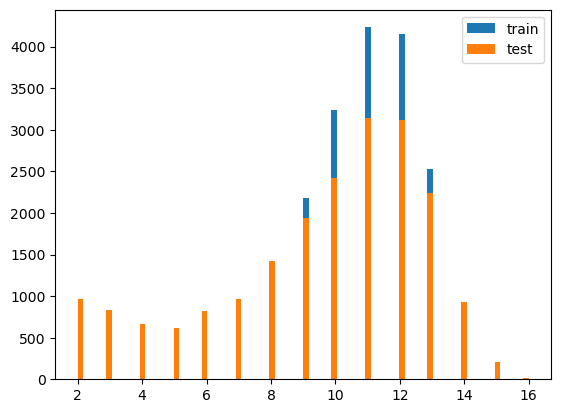

In [18]:
plt.hist(train['MTC'], bins=80, label='train')
plt.hist(test['MTC'], bins=80,  label='test')
plt.legend()

In [11]:
train.columns

Index(['MTC', 'degree', 'in_degree', 'out_degree', 'betweenness_centrality',
       'closeness_centrality', 'katz_centrality', 'sid', 'call_time', 'eid',
       'end_time', 'delta_min', 'time_to_sink'],
      dtype='object')

In [12]:
ns_metrics = train.columns[1:7].tolist() 
order_val = train.columns[7:13].tolist()

call_and_delta =  [train.columns[8]] + [train.columns[11]]
input_feature = ns_metrics + order_val[:-2]
input_feature_order = input_feature[6:]
print(input_feature_order)

['sid', 'call_time', 'eid', 'end_time']


In [13]:
# train.columns[:6].tolist() + train.columns[9:15].tolist()
X_train = train[input_feature]
X_train['call_time'] = (X_train['call_time'].dt.hour -8)*60 + X_train['call_time'].dt.minute
X_train['end_time'] = (X_train['end_time'].dt.hour -8)*60 + X_train['end_time'].dt.minute
y_train = train["MTC"].to_list()
y_train = np.array(y_train).reshape(-1, 1)
X_train = X_train.values

X_test = test[input_feature]
X_test['call_time'] = (X_test['call_time'].dt.hour -8)*60 + X_test['call_time'].dt.minute
X_test['end_time'] = (X_test['end_time'].dt.hour -8)*60 + X_test['end_time'].dt.minute
y_test = test["MTC"].to_list()
y_test = np.array(y_test).reshape(-1, 1)
X_test = X_test.values


/tmp/ipykernel_15854/570850417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['call_time'] = (X_train['call_time'].dt.hour -8)*60 + X_train['call_time'].dt.minute
/tmp/ipykernel_15854/570850417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['end_time'] = (X_train['end_time'].dt.hour -8)*60 + X_train['end_time'].dt.minute
/tmp/ipykernel_15854/570850417.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

# Ridge Regression

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

In [15]:
reg = linear_model.LinearRegression()

# Split the data into training/testing sets
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

X_train_scaled = X_scaled[:len(X_train)]
y_train_scaled = y_scaled[:len(y_train)]
X_test_scaled = X_scaled[len(X_train):]
y_test_scaled = y_scaled[len(y_train):]

'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Train the model using the training sets
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
reg.score(X_train, y_train)
reg.score(X_test, y_test)

# para = np.concatenate((reg.coef_, reg.intercept_.reshape(-1, 1)) , axis=1)
# print(para)
# np.savetxt("..//..//..//Database//prediction//ridge_reg.csv", para, delimiter=",")

# plt.scatter(X_test, y_test,  color='black')

'''

'\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)\n\n# Train the model using the training sets\nreg.fit(X_train, y_train)\ny_pred = reg.predict(X_test)\n\n# The coefficients\nprint("Coefficients: \n", reg.coef_)\n# The mean squared error\nprint("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))\n# The coefficient of determination: 1 is perfect prediction\nprint("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))\nreg.score(X_train, y_train)\nreg.score(X_test, y_test)\n\n# para = np.concatenate((reg.coef_, reg.intercept_.reshape(-1, 1)) , axis=1)\n# print(para)\n# np.savetxt("..//..//..//Database//prediction//ridge_reg.csv", para, delimiter=",")\n\n# plt.scatter(X_test, y_test,  color=\'black\')\n\n'

In [16]:
# regr = MLPRegressor(hidden_layer_sizes = (50,50,50), max_iter=500, activation= "tanh", solver= 'sgd')
# scores = cross_val_score(regr, X, y, cv=5)
# scores

/home/ruiting/miniconda3/envs/ox/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/ruiting/miniconda3/envs/ox/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


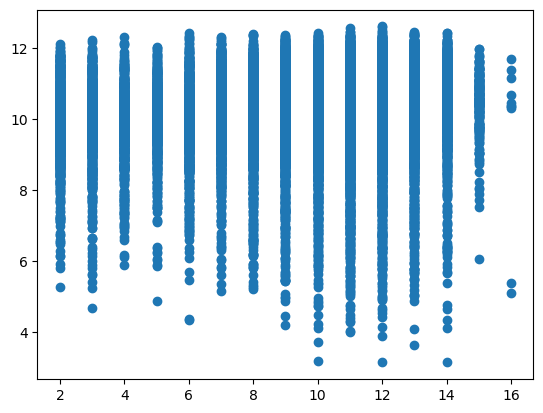

In [17]:
regr = MLPRegressor(hidden_layer_sizes = (50,50,50), random_state=1, max_iter=500, activation= 'tanh', solver= 'sgd').fit(X_train_scaled, y_train_scaled)
# scores = cross_val_score(regr, X, y, cv=5)
y_pre_scaled = regr.predict(X_test_scaled)
y_pre_true = scaler.inverse_transform(y_pre_scaled.reshape(-1, 1))
plt.scatter(y_test, y_pre_true)
plt.show()

# SVM

In [ ]:
input_feature

['degree',
 'in_degree',
 'out_degree',
 'betweenness_centrality',
 'closeness_centrality',
 'katz_centrality',
 'sid',
 'call_time',
 'eid',
 'end_time']

In [ ]:
clf = svm.SVR(kernel = 'rbf')
scores = cross_val_score(clf, X_train_scaled, y_train_scaled, cv=5)
scores.mean()

/home/ruiting/miniconda3/envs/ox/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ruiting/miniconda3/envs/ox/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ruiting/miniconda3/envs/ox/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ruiting/miniconda3/envs/ox/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was pass

-0.266002060437047

In [ ]:
# clf = svm.SVR(kernel = 'rbf')
# scores = cross_val_score(clf, X_train_scaled[:, :6], y_train_scaled, cv=5)
# scores

In [ ]:
# clf = svm.SVR(kernel = 'rbf')
# scores = cross_val_score(clf, X_train_scaled, y_train_scaled, cv=5)
# scores.mean()

In [ ]:
X_train_scaled.shape

(9756, 4)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [100, 500], 'gamma': [0.01, 0.1], 'kernel': ['rbf']}
base_estimator = svm.SVR()

clf = GridSearchCV(base_estimator, param_grid, cv=5, n_jobs = -1, verbose = 2)
clf.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


KeyboardInterrupt: 

In [ ]:
print(clf.best_params_) 
print(clf.best_estimator_) 

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
clf_best = svm.SVR(C=100, gamma=0.001)

clf_best.fit(X_train_scaled, y_train_scaled)
y_pre = clf_best.predict(X_test_scaled)
y_pre_true = scaler.inverse_transform(y_pre.reshape(-1, 1))

r2_score(y_test_scaled, y_pre), r2_score(y_test, y_pre_true)

c:\Users\Admin\anaconda3\envs\networkflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9569286409869725, 0.9569286409869725)

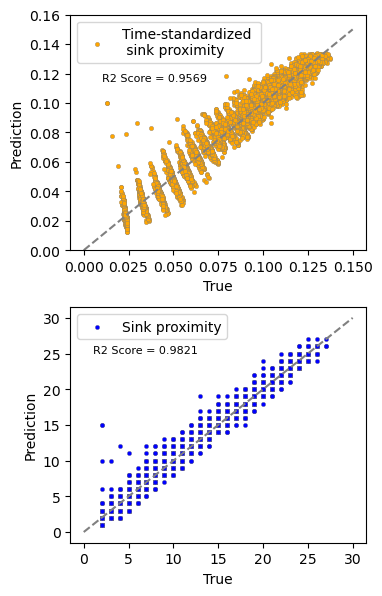

In [ ]:
df0 = pd.DataFrame({'y_test': y_test.flatten(), 'y_pre': y_pre_true.flatten()})
df1 = pd.DataFrame({'y_test': test['MTC'], 'y_pre': (y_pre_true.ravel() * test['time_to_sink'].to_list()).round().flatten()})
r2_s1 = r2_score(y_test, y_pre_true)
r2_s2 = r2_score(test['MTC'], (y_pre_true.ravel() * test['time_to_sink'].to_list()).round().flatten())

fig, ax = plt.subplots(2, 1, figsize=(4, 6), tight_layout=True)
ax = ax.ravel()
sns.scatterplot(data=df0, x="y_test", y="y_pre",  color = 'orange', edgecolor='grey', label = "Time-standardized \n sink proximity", markers='o', s=10, ax= ax[0])
sns.scatterplot(data=df1, x="y_test", y="y_pre",  color = 'blue', edgecolor='grey', label = "Sink proximity", markers='o', s=10, ax= ax[1])
sns.lineplot(x=[0, 0.15], y=[0, 0.15], color = 'grey', linestyle = '--', ax=ax[0])
sns.lineplot(x=[0, 30], y=[0, 30], color = 'grey', linestyle = '--', ax=ax[1])
ax[0].set_xlabel('True')
ax[0].set_ylabel('Prediction')
ax[1].set_xlabel('True')
ax[1].set_ylabel('Prediction')
ax[0].set_ylim(0, 0.16)

ax[0].annotate('R2 Score = %0.4f'%r2_s1, xy=(0.01, 0.115), xytext=(0.01, 0.115), fontsize=8)
ax[1].annotate('R2 Score = %0.4f'%r2_s2, xy=(1,25), xytext=(1,25), fontsize=8)

ax[0].legend(loc = 2)
ax[1].legend(loc = 2)

plt.savefig("..//..//..//prediction//SVR_only_order.png", dpi=300, bbox_inches='tight')

In [19]:
# plt.figure(figsize=(6, 4))
# sns.scatterplot(data=df, x="y_test", y="y_pre",  color = 'orange', edgecolor='grey', label = "Sink proximity", markers='o', s=10)
# plt.xlabel('True')
# plt.ylabel('Prediction')
# plt.legend()

# plt.savefig("..//..//..//prediction//SVR.png", dpi=300, bbox_inches='tight')

IndexError: index 10 is out of bounds for axis 1 with size 10

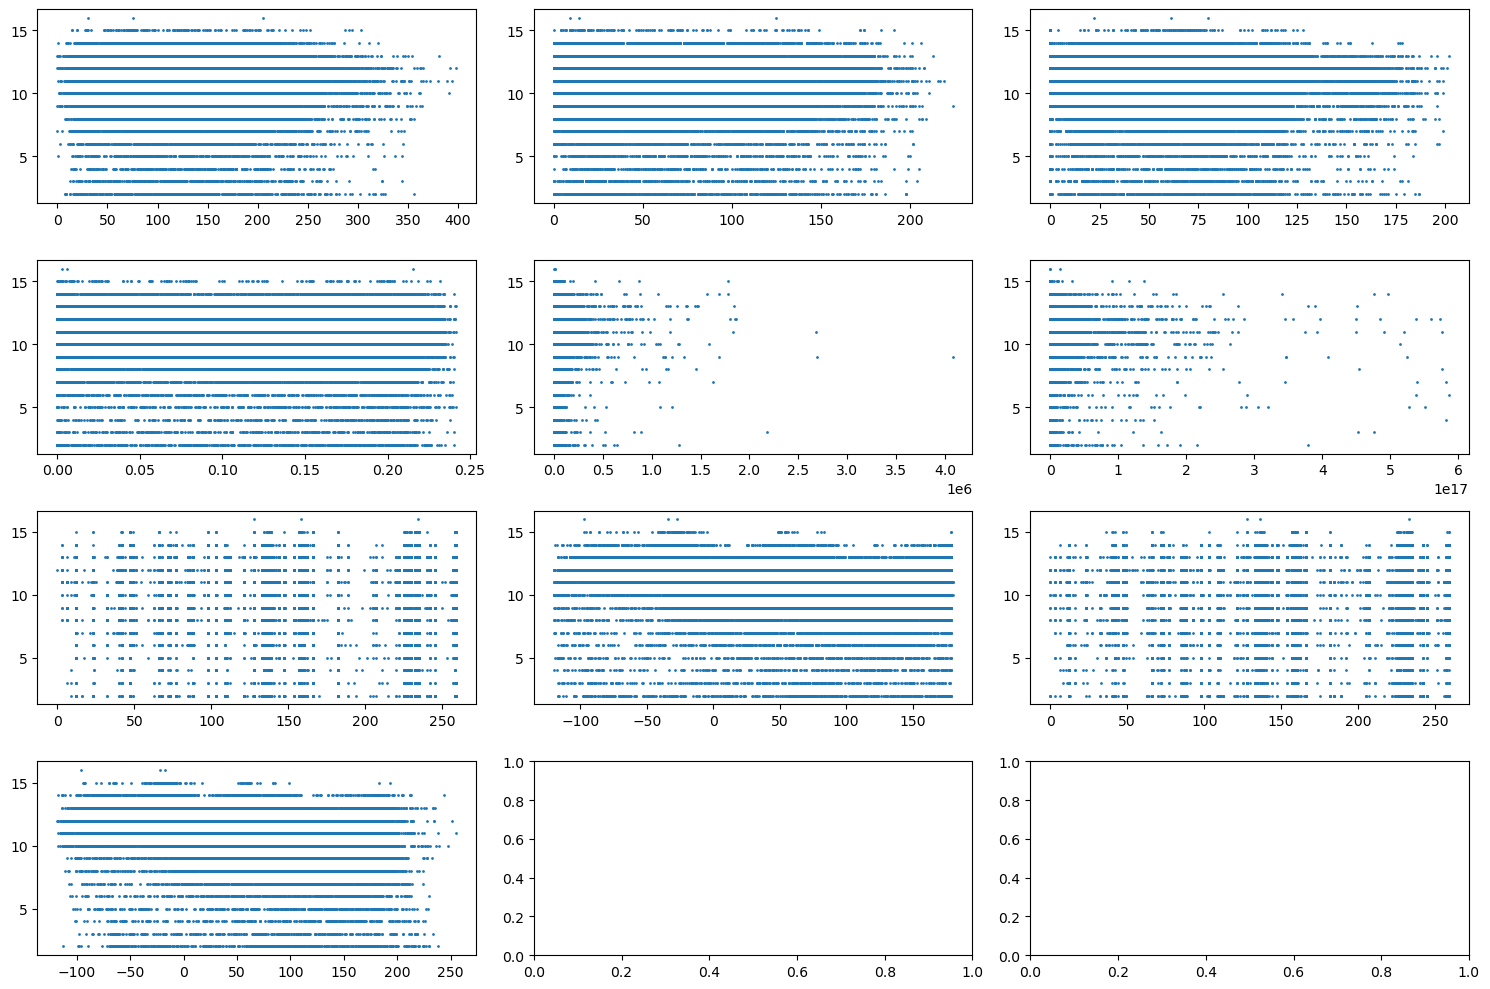

In [20]:
fig, ax = plt.subplots(4, 3, figsize=(15, 10), tight_layout=True)
ax = ax.ravel()
ax[0].scatter(X_train[:, 0], y_train, s = 1)
ax[1].scatter(X_train[:, 1], y_train, s = 1)
ax[2].scatter(X_train[:, 2], y_train, s = 1)
ax[3].scatter(X_train[:, 3], y_train, s = 1)
ax[4].scatter(X_train[:, 4], y_train, s = 1)
ax[5].scatter(X_train[:, 5], y_train, s = 1)
ax[6].scatter(X_train[:, 6], y_train, s = 1)
ax[7].scatter(X_train[:, 7], y_train, s = 1)
ax[8].scatter(X_train[:, 8], y_train, s = 1)
ax[9].scatter(X_train[:, 9], y_train, s = 1)
ax[10].scatter(X_train[:, 10], y_train, s = 1)


In [ ]:
X_train

array([[ 68,  78,  47, 119],
       [166,  43,  47,  58],
       [166,  31,  47,  46],
       ...,
       [128,  78, 104, 110],
       [138,  59,  30,  95],
       [213,  22,  22,  59]], dtype=int64)

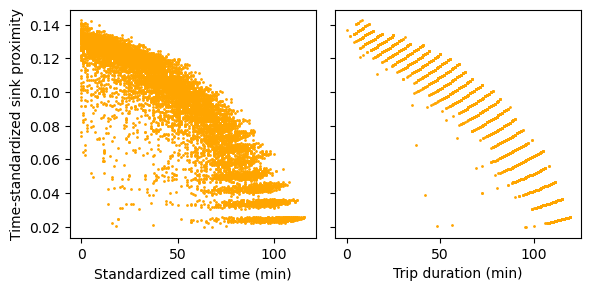

In [ ]:
scaler.inverse_transform(y_pre.reshape(-1, 1))

fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True, tight_layout=True)
ax = ax.ravel()
ax[0].scatter(X_train[:, 1], y_train, s = 1, color = 'orange')
ax[1].scatter(X_train[:, 3], y_train, s = 1, color = 'orange')
ax[0].set_xlabel('Standardized call time (min)')
ax[1].set_xlabel('Trip duration (min)')
ax[0].set_ylabel('Time-standardized sink proximity')


plt.savefig("..//..//..//prediction//MTC_vs_time.png", dpi=300, bbox_inches='tight')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_train[:, :6])
X_pcaed = pca.transform(X_train[:, :6])

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.89474581 0.06630661 0.03884874]
[17284.34154124  4705.23601542  3601.56673923]


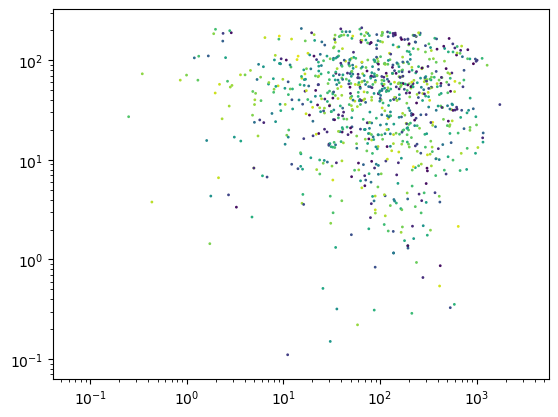

In [ ]:
import seaborn as sns
plt.scatter(X_pcaed[:, 0], X_pcaed[:, 1], s = 1, c = y_train)
plt.xscale('log')
plt.yscale('log')